In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [103]:
VDG_df = pd.read_csv(r"C:\Users\excel\Downloads\Video_Games_Sales.csv")
print(VDG_df.head(5))

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [3]:
VDG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


0          8
1          8
2        8.3
3          8
4          8
        ... 
16714      0
16715      0
16716      0
16717      0
16718      0
Name: User_Score, Length: 16719, dtype: object

In [99]:
[VDG_df['User_Score']==1].sum()

AttributeError: 'list' object has no attribute 'sum'

In [10]:
print('Name missing', VDG_df['Name'].isna().sum())
print('missing year',VDG_df['Year_of_Release'].isna().sum())
print('Genre missing', VDG_df['Genre'].isna().sum())
print('missing Publisher',VDG_df['Publisher'].isna().sum())
print('missing Critic_Score',VDG_df['Critic_Score'].isna().sum())
print('Critic_Count missing', VDG_df['Critic_Count'].isna().sum())
print('missing User_Score',VDG_df['User_Score'].isna().sum())
print('User_Count missing', VDG_df['User_Count'].isna().sum())
print('missing Developer',VDG_df['Developer'].isna().sum())
print('Rating missing', VDG_df['Rating'].isna().sum())

Name missing 2
missing year 269
Genre missing 2
missing Publisher 54
missing Critic_Score 8582
Critic_Count missing 8582
missing User_Score 6704
User_Count missing 9129
missing Developer 6623
Rating missing 6769


In [104]:
# Dropping missing value in Name column
VDG_df['Year_of_Release'] = VDG_df['Year_of_Release'].fillna(method = 'bfill')

In [105]:
VDG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [106]:
VDG_df['Year_of_Release'] = VDG_df['Year_of_Release'].astype(int)

In [42]:
VDG_df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
CC_mean = round(VDG_df['Critic_Count'].mean(),2)
CS_mean = round(VDG_df['Critic_Score'].mean(),2)
UC_mean = round(VDG_df['User_Count'].mean(),2)

Rt_mode = VDG_df['Rating'].mode()
print(CC_mean)
print(CS_mean)
print(UC_mean)

print(Rt_mode)

26.36
68.97
162.23
0    E
Name: Rating, dtype: object


In [108]:
# Dropping missing value in Name column
VDG_df['Critic_Count'] = VDG_df['Critic_Count'].fillna(CC_mean)
VDG_df['Critic_Score'] = VDG_df['Critic_Score'].fillna(CS_mean)
VDG_df['User_Count'] = VDG_df['User_Count'].fillna(UC_mean)
VDG_df['Rating'] = VDG_df['Rating'].fillna(Rt_mode)


In [128]:
VDG_df['Rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16719 entries, 0 to 16718
Series name: Rating
Non-Null Count  Dtype 
--------------  ----- 
9950 non-null   object
dtypes: object(1)
memory usage: 130.7+ KB


In [119]:
US_mode = VDG_df['User_Score'].mode()
print(US_mode)

0    0
Name: User_Score, dtype: object


In [120]:
VDG_df['User_Score'] = VDG_df['User_Score'].fillna(US_mode)

In [115]:
VDG_df['User_Score'] = VDG_df['User_Score'].replace('tbd',0)


In [144]:
# VDG_df['User_Score'] = VDG_df['User_Score'].replace('8.3',8.3)


C:\Users\excel\AppData\Local\Temp\ipykernel_27008\766270685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VDG_df['User_Score'] = VDG_df['User_Score'].replace('8.3',8.3)


TypeError: 'Int64Index' object is not callable

In [126]:
dev_mode = VDG_df['Developer'].mode()
dev_mode

0    Ubisoft
Name: Developer, dtype: object

In [127]:
pub_mode = VDG_df['Publisher'].mode()
pub_mode

0    Electronic Arts
Name: Publisher, dtype: object

In [133]:
VDG_df['Rating'] = VDG_df['Rating'].fillna(method= 'ffill')

In [134]:
VDG_df['Rating'].isna().sum()

0

In [140]:
VDG_df['Developer'] = VDG_df['Developer'].fillna(method= 'ffill')
VDG_df['Publisher'] = VDG_df['Publisher'].fillna(method= 'ffill')

In [142]:
VDG_df = VDG_df.dropna()

In [143]:
VDG_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  int32  
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       16717 non-null  object 
 13  User_Count       16717 non-null  float64
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(8), int32(1), object(7)
memory usage: 2.1+ MB


In [150]:
# descriptive statistics
VDG_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000
mean,2006.481964,0.263255,0.145010,0.077610,0.047333,0.533462,68.968870,26.360400,162.229958
std,5.894085,0.813475,0.503303,0.308836,0.186721,1.547956,9.723998,13.241794,378.187754
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,68.970000,22.000000,30.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.970000,26.360000,162.230000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360000,162.230000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [151]:
# correlation of Global sales to crit score
VDG_df['Global_Sales'].corr(VDG_df['Critic_Score'])

0.2009737041336869

In [152]:
VDG_df['Global_Sales'].corr(VDG_df['Critic_Count'])

0.24855940037157281

In [153]:
VDG_df['Global_Sales'].corr(VDG_df['User_Count'])

0.21636455713121522

In [154]:
VDG_df['Year_of_Release'].skew()

-0.981699336807323

In [155]:
VDG_df['Global_Sales'].skew()

17.379414082230095

In [156]:
VDG_df['Critic_Score'].skew()

-0.8798436049218444

In [157]:
VDG_df['User_Count'].skew()

13.404646879022552

In [159]:
VDG_df['Global_Sales'].corr(VDG_df['Year_of_Release'])

-0.07566650858202303

In [ ]:
# Graphical information


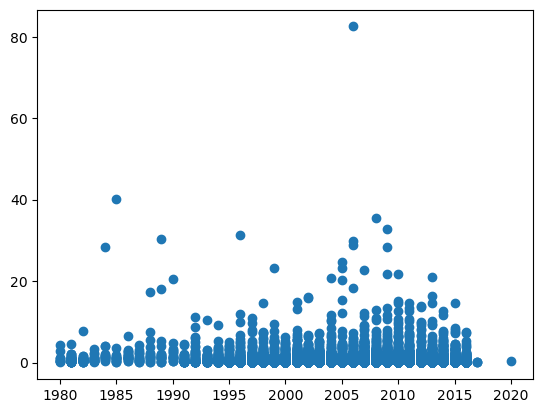

In [158]:
plt.scatter(x = 'Year_of_Release', y ='Global_Sales',data =  VDG_df)
plt.show()

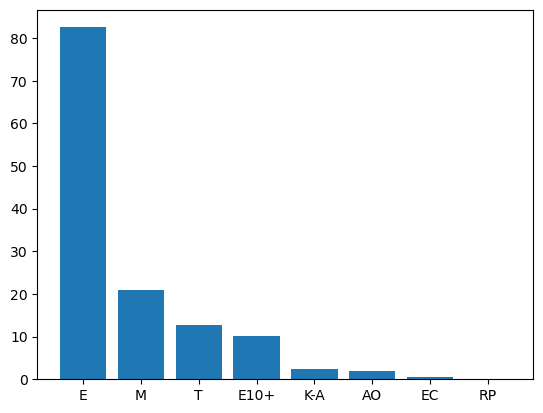

In [160]:
plt.bar(x = 'Rating', height ='Global_Sales',data =  VDG_df)
plt.show()

(array([1.5621e+04, 6.8800e+02, 1.9800e+02, 8.6000e+01, 4.3000e+01,
        1.9000e+01, 1.3000e+01, 1.1000e+01, 9.0000e+00, 6.0000e+00,
        2.0000e+00, 1.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e-02, 1.66040e+00, 3.31080e+00, 4.96120e+00, 6.61160e+00,
        8.26200e+00, 9.91240e+00, 1.15628e+01, 1.32132e+01, 1.48636e+01,
        1.65140e+01, 1.81644e+01, 1.98148e+01, 2.14652e+01, 2.31156e+01,
        2.47660e+01, 2.64164e+01, 2.80668e+01, 2.97172e+01, 3.13676e+01,
        3.30180e+01, 3.466

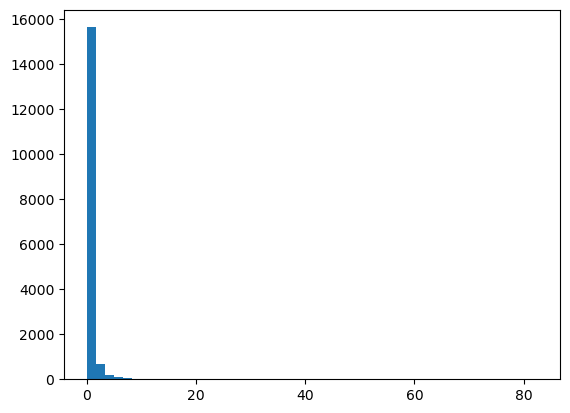

In [162]:
plt.hist(VDG_df['Global_Sales'],bins = 50)

In [163]:
import seaborn as sns

<Axes: >

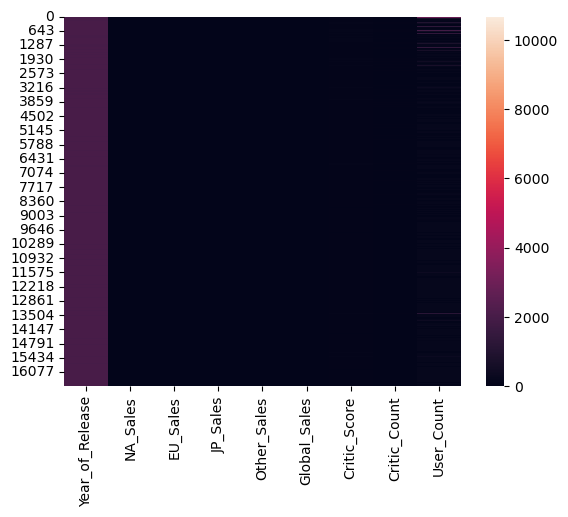

In [165]:
sns.heatmap(VDG_df[["Year_of_Release","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales","Critic_Score","Critic_Count","User_Count"]])